### Kaggle Neural network challenging

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
#loading the train set and test set
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [3]:
#number of examples are have in the train and test dataset
print("the shape of the train set :",data_train.shape)
print("the shape of the test set :",data_test.shape)

the shape of the train set : (891, 12)
the shape of the test set : (418, 11)


### Deciding the features useful 

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# missing values
data_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

- here has the missing values from the "Age", "Cabin" ,"Embarked"

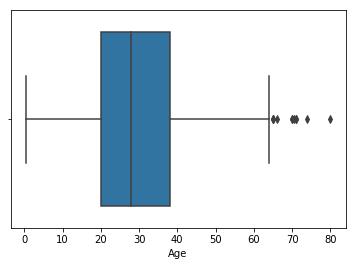

In [6]:
# plotting the age for checking is it have any ouliers
sbn.boxplot(data_train["Age"])

In [7]:
data_train.Age.mean()

29.69911764705882

In [8]:
a=data_train["Age"].fillna(data_train["Age"].mean())

/home/sai/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


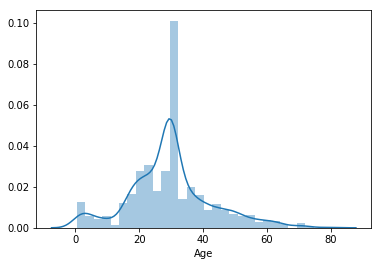

In [9]:
sbn.distplot(a)

In [10]:
# missing values fill with the mean or mode values
data_train["Age"].fillna(data_train["Age"].mean(),inplace=True)
data_test["Age"].fillna(data_test["Age"].mean(),inplace=True)
data_test["Fare"].fillna(data_test["Fare"].mean(),inplace=True)

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
# checking the Embarked column  with the plots
# value connt the embarked column
data_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- here the majority value is s ---> we can replace with the values "s"


In [13]:
data_train["Embarked"].fillna("S",inplace=True)

In [14]:
data_train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
data_train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [16]:
# find the correlation between the features
corr=data_train.corr()
print(corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.033207 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.069809 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.331339  0.083081  0.018443   
Age             0.033207 -0.069809 -0.331339  1.000000 -0.232625 -0.179191   
SibSp          -0.057527 -0.035322  0.083081 -0.232625  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.179191  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091566  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.091566  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


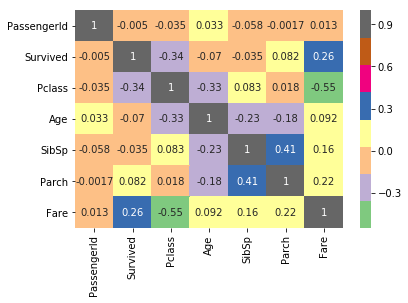

In [17]:
# corr can be visible with the heatmap 
sbn.heatmap(corr,cmap=plt.cm.Accent,mask=False,annot=True)

- we can remove the [passengerid,name,ticket,cabin]

- here we have majority of the categorical variables so checking the correlation makes a mistake for analyzing the values
- so directly elimanate the values so we can do elimenation with the method called backward elimination

- by type of the variables we eliminated some the features
- we can analyze the variables of categorical variables by plotting their distribution any analyze how 
  the will effect the target variable

/home/sai/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


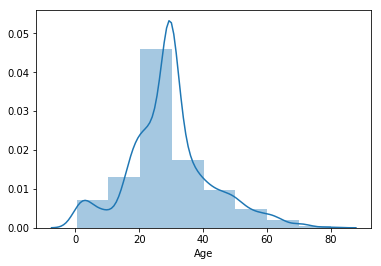

In [18]:
sbn.distplot(data_train.Age,bins=8)

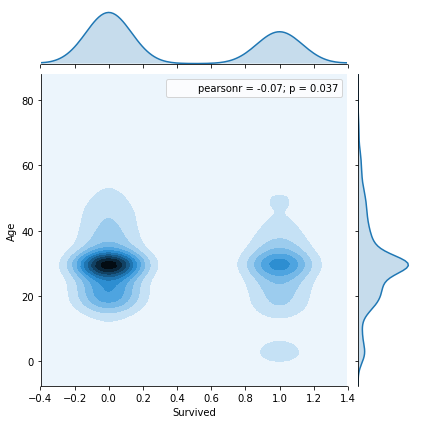

In [19]:
sbn.jointplot(x="Survived",y="Age",data=data_train,kind="kde")

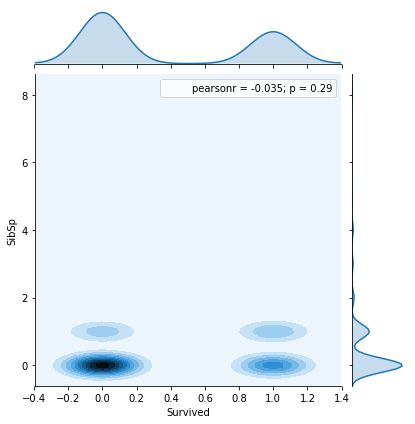

In [20]:
sbn.jointplot(x="Survived",y="SibSp",data=data_train,kind="kde")

- here majority of people died from the "0" sibilings
- and 50% of peoples died who are have 1 sib

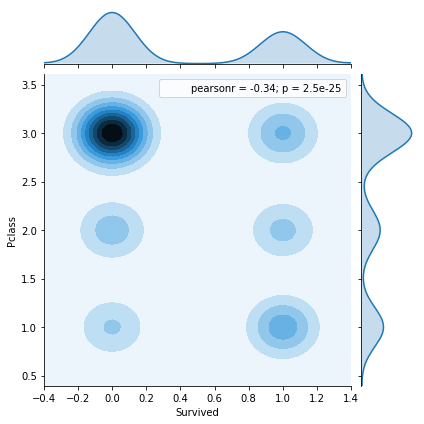

In [21]:
sbn.jointplot(x="Survived",y="Pclass",data=data_train,kind="kde")

- poverty can lead to die in some cases
- here majority of peoples who belongs to 3 rd class are died
- having more money can save their lives in this case also it can be true -> majority of the 1 st class peoples can survived hear

Text(0.5,1,'PCLASS Vs SURVIVED')

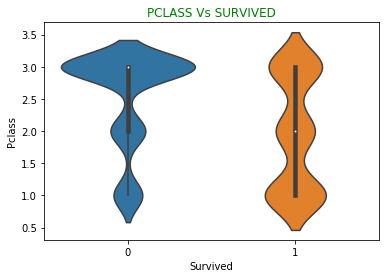

In [22]:
# we can analyze this more on the vilone plots
sbn.violinplot(x="Survived",y="Pclass",data=data_train)
plt.title("PCLASS Vs SURVIVED",color="g")

Text(0.5,1,'PARCH Vs SURVIVED')

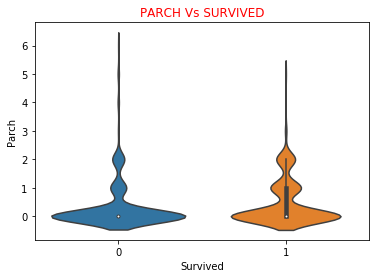

In [23]:
sbn.violinplot(x="Survived",y="Parch",data=data_train)
plt.title("PARCH Vs SURVIVED",color="r")

Text(0.5,1,'SIBSP Vs SURVIVED')

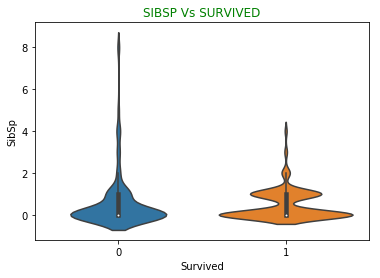

In [24]:
sbn.violinplot(x="Survived",y="SibSp",data=data_train)
plt.title("SIBSP Vs SURVIVED",color="g")

#### step 2: Preprocessing the data

In [25]:
#1. let see is there any missing values
data_train.count()
# here "cabin" has a missing value but it is going to be discard from the data set
# apart from this there is no missing values to be fullfilled

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       891
dtype: int64

In [26]:
#dropping the unneccessary features from the training data
# the features we have to drop is ["PassengeId","Name","ticket","Cabin"]

clen_dat=data_train.drop(["PassengerId","Name","Ticket","Cabin","Parch","SibSp"],axis=1)
t_clen_dat=data_test.drop(["PassengerId","Name","Ticket","Cabin","Parch","SibSp"],axis=1)

In [27]:
clen_dat.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [28]:
# now task is to group the age in to bins 
# now we have to create 9 bins
# we have an age in the range of [0-90]
# so we can create 9 bins

age=[]
for i in clen_dat["Age"]:
    if(i>0 and i<=10):
        age.append("a")
    elif(i>10 and i<=20):
        age.append("b")
    elif(i>20 and i<=30):
        age.append("c")
    elif(i>30 and i<=40):
        age.append("d")
    elif(i>40 and i<=50):
        age.append("e")
    elif(i>50 and i<=60):
        age.append("f")
    elif(i>60 and i<=70):
        age.append("g")
    elif(i>70 and i<=80):
        age.append("h")
    elif(i>80):
        age.append("i")
        
age_t=[]
for i in t_clen_dat["Age"]:
    if(i>0 and i<=10):
        age_t.append("a")
    elif(i>10 and i<=20):
        age_t.append("b")
    elif(i>20 and i<=30):
        age_t.append("c")
    elif(i>30 and i<=40):
        age_t.append("d")
    elif(i>40 and i<=50):
        age_t.append("e")
    elif(i>50 and i<=60):
        age_t.append("f")
    elif(i>60 and i<=70):
        age_t.append("g")
    elif(i>70 and i<=80):
        age_t.append("h")
    elif(i>80):
        age_t.append("i")
    

In [29]:
clen_dat["Age"]=age
t_clen_dat["Age"]=age_t

In [30]:
clen_dat.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,c,7.2500,S
1,1,1,female,d,71.2833,C
2,1,3,female,c,7.9250,S
3,1,1,female,d,53.1000,S
4,0,3,male,d,8.0500,S


In [31]:
# we have categorical variables --> ["Pclass","Sex","SibSp","Parch","Embarked"]
x_train=clen_dat.iloc[:,1:].values
y_train=clen_dat.iloc[:,0].values
x_test=t_clen_dat.iloc[:,:].values

In [32]:
# the shape of the x_train and y_train
y_train=y_train.reshape((891,1))
print("the shape of the x_train and y_train is :",x_train.shape,y_train.shape)

the shape of the x_train and y_train is : (891, 5) (891, 1)


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:,3:4]=sc.fit_transform(x_train[:,3:4])
x_test[:,3:4]=sc.fit_transform(x_test[:,3:4])

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
#Label Encoder and OnehotEncoder for the given data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
Le=LabelEncoder()
x_train[:,1]=Le.fit_transform(x_train[:,1])
x_train[:,2]=Le.fit_transform(x_train[:,2])
x_train[:,4]=Le.fit_transform(x_train[:,4])
x_test[:,1]=Le.fit_transform(x_test[:,1])
x_test[:,2]=Le.fit_transform(x_test[:,2])
x_test[:,4]=Le.fit_transform(x_test[:,4])
ohe=OneHotEncoder(categorical_features=[0,1,2,4])
x_train=ohe.fit_transform(x_train).toarray()
x_test=ohe.fit_transform(x_test).toarray()

In [35]:
x_train.shape

(891, 17)

### Building the shallow Neural Network model

In [47]:
def Derv_tanh(a):
    return 1-a**2
def Derv_sig(a):
    return a*(1-a)
def Activation(x_train,para,bias):
    z=np.dot(x_train,para.T)+bias.T
    return 1/(1+np.exp(-z))
def Activation1(x_train,para,bias):
    z=np.dot(x_train,para.T)+bias.T
    return np.tanh(z)
def Forward_propagation(x_train,w1,b1,w2,b2):
    # 1st layer
    a1=Activation1(x_train,w1,b1)
    
    # 2nd layer
    a2=Activation(a1,w2,b2)
    
    return a1,a2
def Back_propagation(x_train,y_train,w1,b1,w2,b2,a1,a2):
    # gradient descent in 2nd layer
    dz2=a2-y_train
    dw2=np.dot(dz2.T,a1)
    db2=np.sum(dz2.T,axis=1,keepdims=True)
    
    # gradient descent in 1st layer
    dz1=np.dot(dz2,w2)*Derv_tanh(a1)
    dw1=np.dot(dz1.T,x_train)
    db1=np.sum(dz1.T,axis=1,keepdims=True)
    
    return dw1,db1,dw2,db2
def Neural_Networks(x_train,y_train,w1,b1,w2,b2,learning_rate):
    num_iters=200
    m=len(x_train)
    for _ in range(num_iters):
        a1,a2=Forward_propagation(x_train,w1,b1,w2,b2)
        dw1,db1,dw2,db2=Back_propagation(x_train,y_train,w1,b1,w2,b2,a1,a2)
        w1=w1-(learning_rate/m)*dw1
        b1=b1-(learning_rate/m)*db1
        w2=w2-(learning_rate/m)*dw2
        b2=b2-(learning_rate/m)*db2
    return w1,b1,w2,b2

def Predict(x_test,w1,b1,w2,b2):
    a1,a2=Forward_propagation(x_test,w1,b1,w2,b2)
    return a1,a2

In [37]:
def Init_para(x_sh,y_sh,h):
    
    w1=np.random.randn(h,x_sh)*1
    b1=2*np.random.random((h,1))-1
    w2=np.random.randn(y_sh,h)*1
    b2=2*np.random.random((y_sh,1))-1
    return w1,b1,w2,b2

In [38]:
learning_rate=0.3
num_hidden_units=54
i_w1,i_b1,i_w2,i_b2=Init_para(x_train.shape[1],y_train.shape[1],num_hidden_units)
w1,b1,w2,b2=Neural_Networks(x_train,y_train,i_w1,i_b1,i_w2,i_b2,learning_rate)

In [39]:
a1,y_pre=Predict(x_train,w1,b1,w2,b2)

In [40]:
a=[]
for i in y_pre:
    if(i>0.5):
        a.append(1)
    else:
        a.append(0)

In [41]:
cou=0
for i in range(len(y_train)):
    if(a[i]==y_train[i]):
        cou+=1
print(cou)
print("the accuracy : ",cou/len(y_train))

765
the accuracy :  0.8585858585858586


In [42]:
dat=pd.read_csv("gender_submission.csv")

In [43]:
s=dat.iloc[:,1]

In [44]:
count=0
for i in range(len(s)):
    if(a[i]==s[i]):
        count+=1
print(count)

219


In [45]:
subm=pd.DataFrame()
subm["PassengerId"]=data_test.iloc[:,0]
subm["Survived"]=a

ValueError: Length of values does not match length of index

In [ ]:
subm.to_csv("submit5.csv",index=False)

### Digit Recognisation

In [72]:
digit=pd.read_csv("train2.csv")
digit_test=pd.read_csv("test1.csv")

In [73]:
# shape of the trainning and testing datasets 
print("the shape of the training datasets  :",digit.shape)
print("the shape of the testing datasets   :",digit_test.shape)

the shape of the training datasets  : (42000, 785)
the shape of the testing datasets   : (28000, 784)


In [79]:
dx_train=digit.iloc[:,1:].values
dy_train=digit.iloc[:,0].values
dx_test=digit_test.iloc[:,:].values

In [83]:
# shape of the splitted datasets :
dy_train=dy_train.reshape((42000,1))
print("the shape of the training dataset  :",dx_train.shape,dy_train.shape)
print("the shape of the testing dataset   :",dx_test.shape)


the shape of the training dataset  : (42000, 784) (42000, 1)
the shape of the testing dataset   : (28000, 784)


In [85]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
Le=LabelEncoder()

ohe=OneHotEncoder(categorical_features=[0])
dy_train=ohe.fit_transform(dy_train).toarray()

In [86]:
dy_train.shape

(42000, 10)

In [87]:
learning_rate=0.05
num_hid=50
i_w1,i_b1,i_w2,i_b2=Init_para(dx_train.shape[1],dy_train.shape[1],num_hid)
w1,b1,w2,b2=Neural_Networks(dx_train,dy_train,i_w1,i_b1,i_w2,i_b2,learning_rate)

In [88]:
_,y_pre=Predict(dx_train,w1,b1,w2,b2)

In [90]:
y_pre.shape

(42000, 10)

In [101]:
y_pre[0]

array([0.00372182, 0.06158038, 0.01421449, 0.05898038, 0.53418026,
       0.45559246, 0.02436533, 0.06538434, 0.13978678, 0.00241928])

In [122]:
y_test=[]
for i in y_pre:
    t=[]
    for j in i:
        if(j>0.5):
            t.append(1)
        else:
            t.append(0)
    y_test.append(t)

In [123]:
y_test

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 1,